In [1]:
# installing package
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# importing data
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## DATA COLUMNS
Gender\
Age\
Height\
Weight\
Family History With Overweight (FHWO)\
Consumption of High Caloric Food (FAVC)\
Consumption of Vegetables(FCVC)\
Number of Main Meals (NCP)\
Consumption of Food Between Meals (CAEC)\
Smoke\
Consumption of Water Daily (CH2O)\
Calories Consumption Monitoring (SCC)\
Physical Activity Frequency (FAF)\
Time Using Technology Devices (TUE)\
Consumption of Alcohol (CALC)\
Transportation Used (MTRANS)\

In [2]:
# data preprocessing 
df = df.rename(columns={'family_history_with_overweight': 'FHWO', 'NObeyesdad' : 'Obesity Level',})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         2111 non-null   object 
 1   Age            2111 non-null   float64
 2   Height         2111 non-null   float64
 3   Weight         2111 non-null   float64
 4   FHWO           2111 non-null   object 
 5   FAVC           2111 non-null   object 
 6   FCVC           2111 non-null   float64
 7   NCP            2111 non-null   float64
 8   CAEC           2111 non-null   object 
 9   SMOKE          2111 non-null   object 
 10  CH2O           2111 non-null   float64
 11  SCC            2111 non-null   object 
 12  FAF            2111 non-null   float64
 13  TUE            2111 non-null   float64
 14  CALC           2111 non-null   object 
 15  MTRANS         2111 non-null   object 
 16  Obesity Level  2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


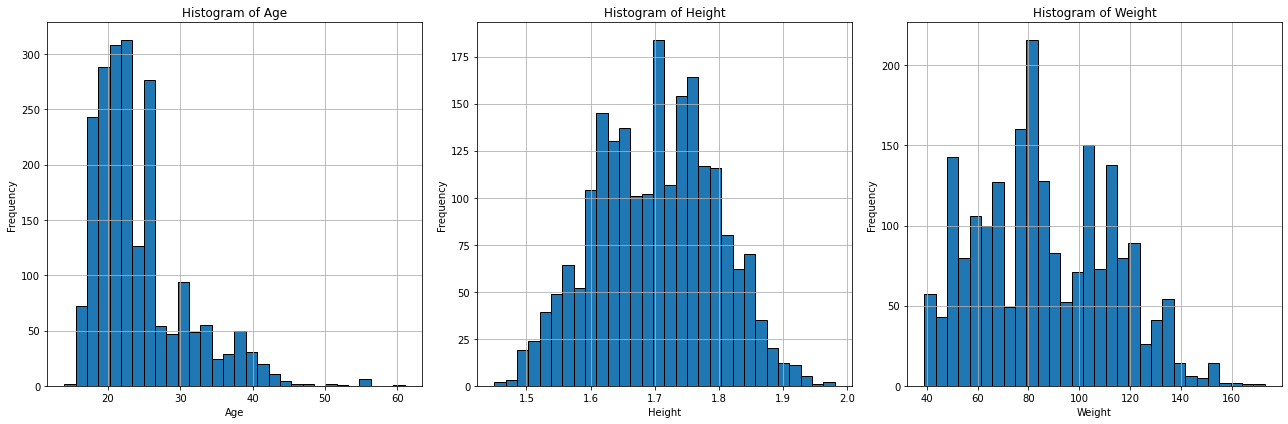

In [3]:
# histogram for age, height, weight
histogram_columns = ["Age", "Height", "Weight"]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, column_name in enumerate(histogram_columns):
    axs[i].hist(df[column_name], bins=30, edgecolor='k')
    axs[i].set_xlabel(column_name)
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Histogram of {column_name}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

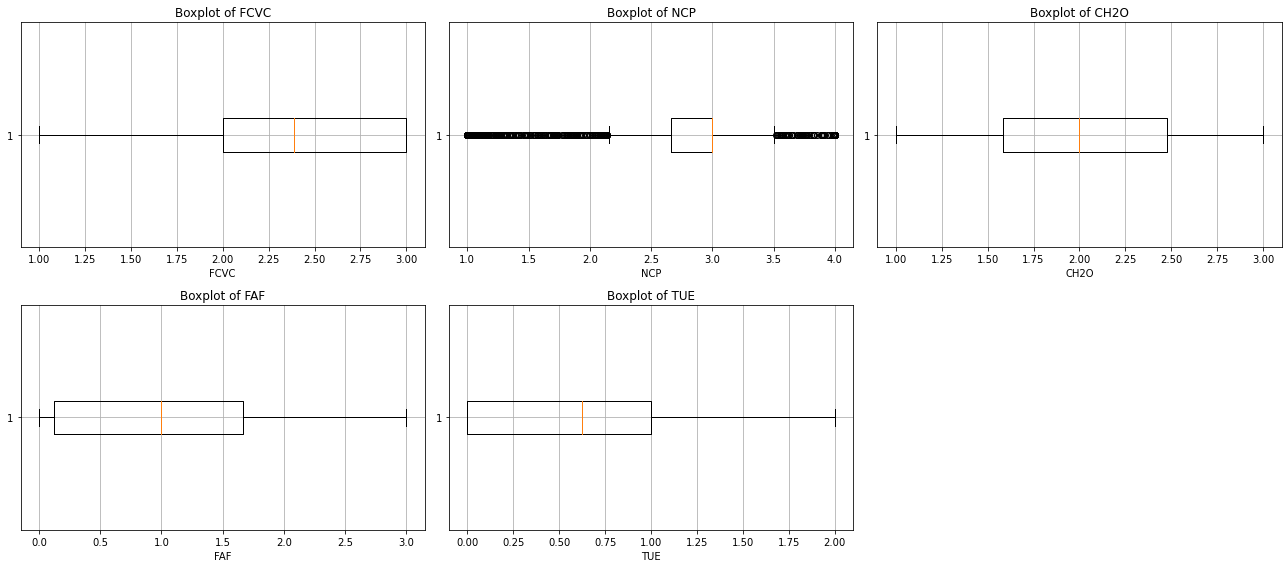

In [4]:
# boxplot for FCVC, NCP, CH2O, FAF, TUE
boxplot_columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

num_plots = len(boxplot_columns)
num_rows = (num_plots - 1) // 3 + 1 
num_cols = min(num_plots, 3)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 8))

axs = axs.ravel()

for i, column_name in enumerate(boxplot_columns):
    axs[i].boxplot(df[column_name], vert=False)
    axs[i].set_xlabel(column_name)
    axs[i].set_title(f"Boxplot of {column_name}")
    axs[i].grid(True)

for i in range(num_plots, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


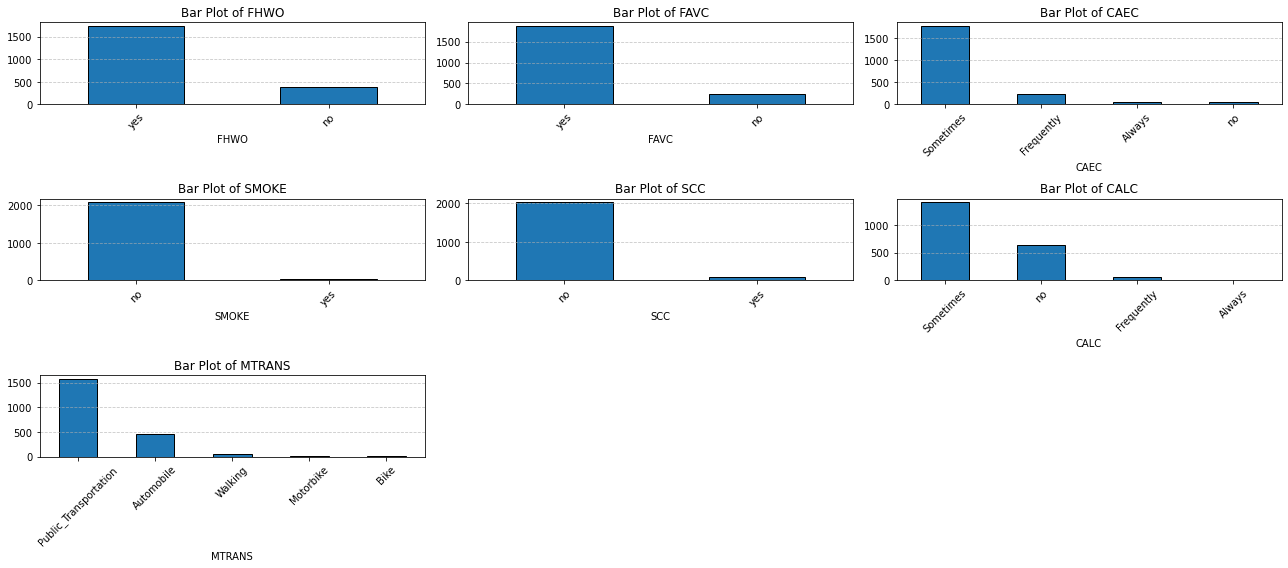

In [5]:
# barplot for FHWO, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS
barplot_columns = ["FHWO", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]


num_plots = len(barplot_columns)
num_rows = (num_plots - 1) // 3 + 1  
num_cols = min(num_plots, 3) 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 8))

axs = axs.ravel()

for i, column_name in enumerate(barplot_columns):
    counts = df[column_name].value_counts()
    counts.plot(kind='bar', ax=axs[i], edgecolor='k')
    axs[i].set_xlabel(column_name)
    axs[i].set_title(f"Bar Plot of {column_name}")
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].tick_params(axis='x', rotation=45) 


for i in range(num_plots, num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [6]:
# Transfer categorical data into numerical data
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
for i in cat_cols:
    print("Column Name: " + i)
    col_val = list(set(df[i].tolist()))
    print("Column Value: " + str(col_val))
    replace_num = []
    for j in range(len(col_val)):
        replace_num.append(j)
    df[i].replace(col_val,replace_num, inplace=True)
    new_val = list(set(df[i].tolist()))
    print("Replaced Value: " + str(new_val))
df.head()

Column Name: SCC
Column Value: ['no', 'yes']
Replaced Value: [0, 1]
Column Name: FHWO
Column Value: ['no', 'yes']
Replaced Value: [0, 1]
Column Name: CAEC
Column Value: ['Always', 'no', 'Frequently', 'Sometimes']
Replaced Value: [0, 1, 2, 3]
Column Name: FAVC
Column Value: ['no', 'yes']
Replaced Value: [0, 1]
Column Name: Gender
Column Value: ['Male', 'Female']
Replaced Value: [0, 1]
Column Name: MTRANS
Column Value: ['Bike', 'Public_Transportation', 'Walking', 'Automobile', 'Motorbike']
Replaced Value: [0, 1, 2, 3, 4]
Column Name: SMOKE
Column Value: ['no', 'yes']
Replaced Value: [0, 1]
Column Name: CALC
Column Value: ['Always', 'no', 'Frequently', 'Sometimes']
Replaced Value: [0, 1, 2, 3]
Column Name: Obesity Level
Column Value: ['Overweight_Level_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Insufficient_Weight', 'Obesity_Type_I', 'Overweight_Level_II', 'Normal_Weight']
Replaced Value: [0, 1, 2, 3, 4, 5, 6]


,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity Level
0,1,21.0,1.62,64.0,1,0,2.0,3.0,3,0,2.0,0,0.0,1.0,1,1,6
1,1,21.0,1.52,56.0,1,0,3.0,3.0,3,1,3.0,1,3.0,0.0,3,1,6
2,0,23.0,1.80,77.0,1,0,2.0,3.0,3,0,2.0,0,2.0,1.0,2,1,6
3,0,27.0,1.80,87.0,0,0,3.0,3.0,3,0,2.0,0,2.0,0.0,2,2,0
4,0,22.0,1.78,89.8,0,0,2.0,1.0,3,0,2.0,0,0.0,0.0,3,1,5


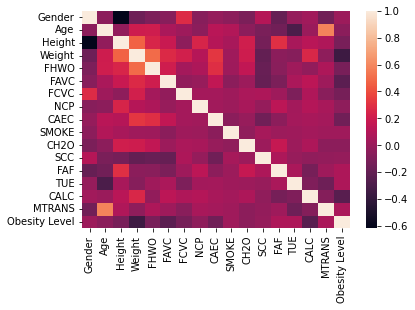

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity Level
Gender,1.000000,-0.048394,-0.618466,-0.161668,-0.102512,-0.064934,0.274505,-0.067600,-0.017632,-0.044698,-0.107930,0.102633,-0.189607,-0.017269,0.032591,-0.148617,0.010097
Age,-0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.117679,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.003533,0.579931,-0.052728
Height,-0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.107325,0.055499,0.213376,-0.133753,0.294709,0.051912,0.119385,0.077937,-0.124075
Weight,-0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.321775,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.260115,-0.040331,-0.356830
FHWO,-0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.288904,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.029996,0.071774,-0.120179
FAVC,-0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150154,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.132760,0.018465,-0.235801
FCVC,0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.040691,0.014320,0.068461,0.071852,0.019939,-0.101135,0.082197,-0.056500,-0.127701
NCP,-0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.028425,0.007811,0.057088,-0.015624,0.129504,0.036326,0.099820,0.052496,-0.040960
CAEC,-0.017632,0.117679,0.107325,0.321775,0.288904,0.150154,0.040691,0.028425,1.000000,-0.051156,-0.009352,-0.155281,-0.046841,0.040699,0.057102,0.044639,-0.150673
SMOKE,-0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.051156,1.000000,-0.031995,0.047731,0.011216,0.017613,0.033164,0.024384,0.025072


In [7]:
# correlation plot 
dataplot=sb.heatmap(df.corr())
  
# displaying heatmap
plt.show()

# displaying the correlation between columns
df.corr()


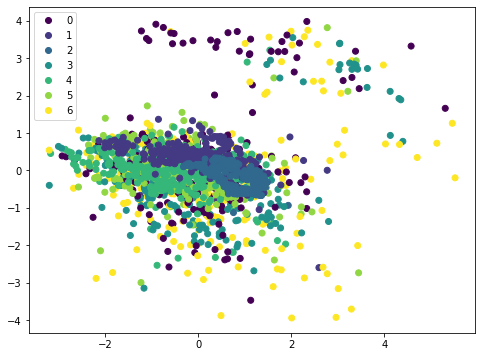

In [8]:
# PCA
# the column Weight and CAEC has the highest 
# the highest correlation coefficient with obesity level
X = df.drop('Obesity Level', axis =1)
y = df['Obesity Level']
target_names = list(set(df['Obesity Level'].tolist()))
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)
plt.figure(figsize=(8,6))
plot = plt.scatter(Xt[:,3], Xt[:,8], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=target_names)
plt.show()
